## _kNN_: _k_-Vecinos Cercanos

Es un algoritmo de aprendizaje supervisado en el que se asigna a un punto de prueba, la clase mayoritaria entre los _k_ vecinos más próximos, utilizando una métrica de distancia. En la siguiente figura se puede ver un ejemplo para _k_ = 5
<pre>
<center><img src="../images/knn.png" height = 500 width = 600></center>
</pre>

## Métricas de distancia

### Minkowski:$\qquad d(\textbf{x}^{[a]}, \textbf{x}^{[b]}) = [ \sum\limits_{j=1}^{m}{(|x_j^{[a]}-x_j^{[b]}|)^p} ]^{\frac{1}{p}}$

### Manhattan: $\quad p=1 \quad d(\textbf{x}^{[a]}, \textbf{x}^{[b]}) =  \sum\limits_{j=1}^{m}{|x_j^{[a]}-x_j^{[b]}|}$

### Euclídea: $\quad p=2 \quad d(\textbf{x}^{[a]}, \textbf{x}^{[b]}) = \sqrt{ \sum\limits_{j=1}^{m}{(x_j^{[a]}-x_j^{[b]})^2}}$

## KNN usando _scikit-Learn_

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Dataset LendingClub 
Este dataset muestra algunos registros de préstamos personales de LendingClub. LendingClub es líder en préstamos entre pares en el que grupos de inversionistas otorgan préstamos personales a individuos. El objetivo del análisis de este dataset sería predecir el resultado de un nuevo préstamo potencial. Las opciones son: pagado _"paid off"_ o incumplido _"default"_

### Cargamos los datos

In [2]:
loan_data=pd.read_csv("../data/loan_data.csv.gz")
loan_data.head()

,Unnamed: 0,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,...,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
0,1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,...,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
1,2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,...,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
2,3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,...,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
3,4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,...,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
4,5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,...,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55


_'payment_inc_ratio'_: relación entre el pago del préstamo y los ingresos

_'dti'_: proporción de pagos de deuda (excuyendo hipotecas) y los ingresos

_'revol_bal'_: crédito disponible en dólares

_'revol_util'_: porcentaje de crédito utilizado

In [3]:
atributos= ['payment_inc_ratio','dti','revol_bal','revol_util']
target = 'outcome'

In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45342 entries, 0 to 45341
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         45342 non-null  int64  
 1   status             45342 non-null  object 
 2   loan_amnt          45342 non-null  int64  
 3   term               45342 non-null  object 
 4   annual_inc         45342 non-null  int64  
 5   dti                45342 non-null  float64
 6   payment_inc_ratio  45342 non-null  float64
 7   revol_bal          45342 non-null  int64  
 8   revol_util         45342 non-null  float64
 9   purpose            45342 non-null  object 
 10  home_ownership     45342 non-null  object 
 11  delinq_2yrs_zero   45342 non-null  int64  
 12  pub_rec_zero       45342 non-null  int64  
 13  open_acc           45342 non-null  int64  
 14  grade              45342 non-null  float64
 15  outcome            45342 non-null  object 
 16  emp_length         453

### Preprocesamiento de los datos

In [5]:
df_target = loan_data.loc[:,target]
loan_data = loan_data.loc[:, atributos]
print(loan_data.shape)
print(df_target.shape)

(45342, 4)
(45342,)


In [7]:
df_target

0         default
1         default
2         default
3         default
4         default
           ...   
45337    paid off
45338    paid off
45339    paid off
45340    paid off
45341    paid off
Name: outcome, Length: 45342, dtype: object

### Entrenamiento de nuestro clasificador

In [6]:
prestamo_nuevo = loan_data.iloc[0:1]
prestamo_nuevo

,payment_inc_ratio,dti,revol_bal,revol_util
0,2.3932,1.0,1687,9.4


In [8]:
X = loan_data.iloc[1:] 
y = df_target.iloc[1:]
print(X.shape)
print(y.shape)

(45341, 4)
(45341,)


In [10]:
np.unique(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1, stratify=y)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
print(knn.predict(prestamo_nuevo))

['paid off']


In [22]:
vecinos = knn.kneighbors(prestamo_nuevo)
vecinos

(array([[ 1.55563118,  5.64040694,  7.13883816,  8.97277387, 10.18822241]]),
 array([[ 9742,  8495, 25677, 10483, 14714]], dtype=int64))

Veo los valores de los atributos que tienen los vecinos

In [23]:
print(X_train.iloc[vecinos[1][0], :])

       payment_inc_ratio   dti  revol_bal  revol_util
35536            1.47212  1.46       1686        10.0
33651            3.38178  6.37       1688         8.4
25863            2.36303  1.39       1691         3.5
43599            4.12244  8.98       1684         7.2
20961            9.42600  7.14       1683         8.6


### Normalizo los datos

In [24]:
from sklearn.preprocessing import StandardScaler

escalador = StandardScaler()
escalador.fit(X_train)
x_std = escalador.transform(X_train)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_std, y_train)

KNeighborsClassifier()

In [25]:
print(knn.predict(prestamo_nuevo))

['default']


In [26]:
vecinos = knn.kneighbors(prestamo_nuevo)
vecinos

(array([[1599.3924025 , 1661.9664258 , 1664.34413939, 1667.11193642,
         1668.076044  ]]),
 array([[14121, 30716,  8147, 16496, 29133]], dtype=int64))

In [29]:
print(X_train.iloc[vecinos[1][0], :])

       payment_inc_ratio    dti  revol_bal  revol_util
43634            3.44454  33.48    1743266        29.5
5636             2.99452  23.46     508961        91.7
44392            4.06825  23.61     462076        87.4
5966             3.19279  22.68     407794        20.8
5615             3.10032   5.32     388892         6.1


In [32]:
nuevo_std = escalador.transform(prestamo_nuevo)
nuevo_std

array([[-1.32794096, -2.00161517, -0.6662369 , -1.83099729]])

In [33]:
print(knn.predict(nuevo_std))

['default']


### Evaluación del desempeño

In [34]:
X_test_std = escalador.transform(X_test)
knn.score(X_test_std, y_test)

0.5488495184885687

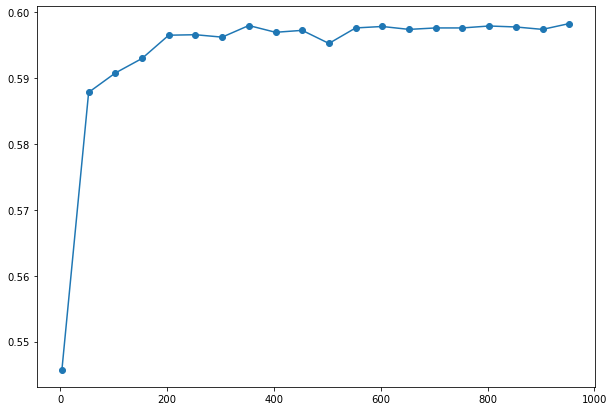

In [35]:
from sklearn.metrics import accuracy_score

valores_k = range(3, 1000, 50)
acc = []

for k in valores_k:
    sknn = KNeighborsClassifier(n_neighbors= k, p=2, metric='minkowski')
    
    sknn.fit(x_std, y_train)
    ypred = sknn.predict(X_test_std)
    acc_pred = accuracy_score(y_test, ypred)
    acc.append(acc_pred)
    
plt.figure(figsize=(10,7))
plt.plot(valores_k, acc, marker='o')
plt.show()

### Ejercicio de repaso

Importe el dataset "breast-cancer-wisconsin.data.txt", los nombres de sus correspondientes columnas están en el archivo "breast-cancer-wisconsin.names.txt". 

Este es un dataset de datos de pacientes con cáncer de mama, con tumores benignos o malignos. 
valores target: 2 o 4.
2 es la probabilidad de cáncer benigno y 4 de cáncer maligno.

Realice un preprocesamiento de los datos:
- Elimine la/las columnas que no sean necesarias para la clasificación
- Verifique los tipos de datos de las características
- Explorar si se tienen valores faltantes
- ¿Cómo es la distribución de valores de la variable de salida? ¿Considera que el dataset está equilibrado?
- ¿Las características presentan outliers?
- Explorar la correlación entre variables
- Después de explorar los datos, divida su dataset en datos de entrenamiento y de prueba(20%)
- Elija un criterio para manejar los datos faltantes
- Normalice sus datos para tener las características en una misma escala
- Implemente un clasificador KNN y entrénelo con los datos de entrenamiento. Realice la predicción con los datos de prueba
- Calcule el accuracy (% de predicciones correctas). 
- Repita el entrenamiento y pruebe con distintos valores de K.